# Hotel Bookings
Author: Supratik Sarkar

Getting basic information about the dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For visualizing Data
%matplotlib inline
import seaborn as sns #For charts and visualizat

In [46]:
df = pd.read_csv("hotel_bookings 2.csv", encoding='unicode_escape')
df.shape

(119390, 32)

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [49]:
# Creating a copy of dataframe

df1 = df.copy()

I tried to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [50]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [51]:
df1['is_canceled'].unique()

array([0, 1], dtype=int64)

In [52]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [53]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [54]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [55]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [56]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

# Cleaning data

# Step 1: Removing duplicate rows if any

In [57]:
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [58]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [59]:
df1.shape

(87396, 32)

# Step2: Handling missing values.

In [60]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
I replaced null values by 0 in these columns

In [61]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [62]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

I replaced the null values under this column with mean value of children.

In [63]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. I replaced the missing value with the mode of 'country' column.

In [64]:
df1['country'].fillna('others', inplace = True)

In [65]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [66]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [67]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

# Step 3: Converting columns to appropriate datatypes.

In [79]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [78]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format='%d-%m-%Y')

ValueError: time data '1/7/2015' does not match format '%d-%m-%Y' (match)

# Step 4: Adding important columns.

In [80]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

# Exploratory Data Analysis

In [81]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


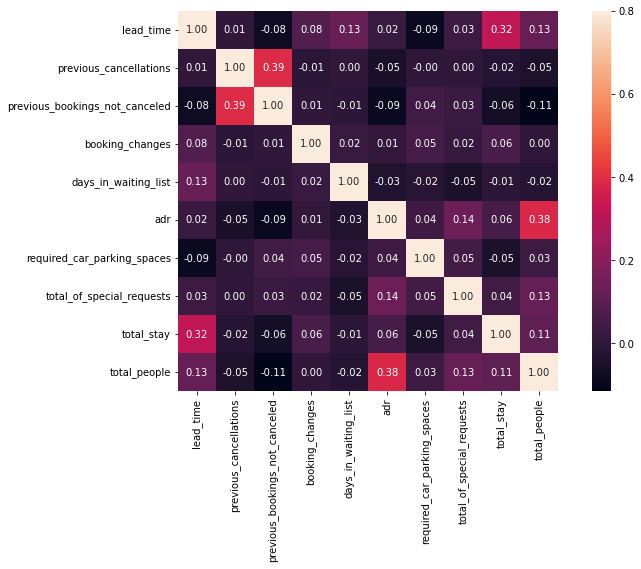

In [82]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1. Total stay length and lead time have slight correlation. This may mean that for longer hotel stays people generally plan little before the the actual arrival.

2. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

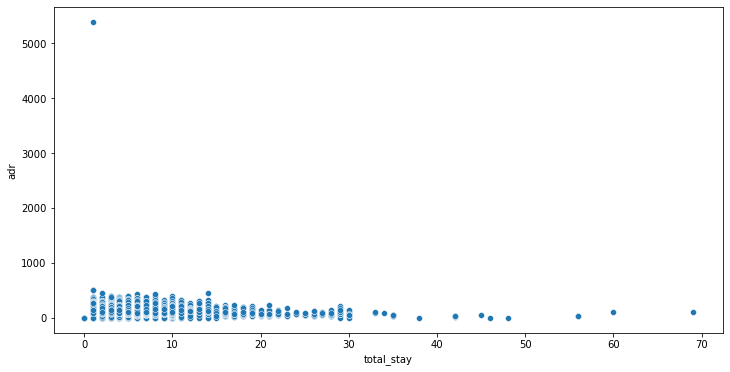

In [83]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

notice that there is an outlier in adr, so I removed that for better scatter plot

In [84]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

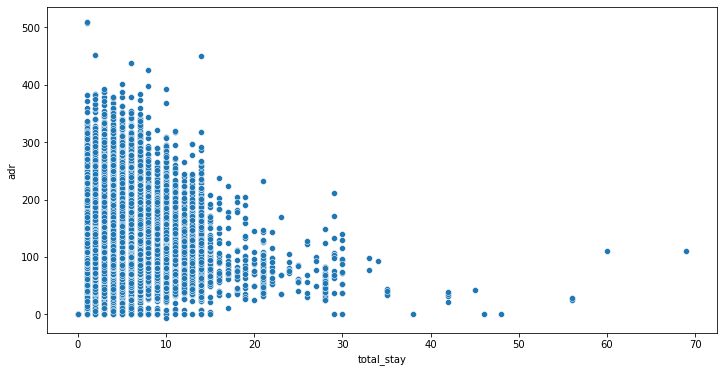

In [86]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# Analysis

Q1) Which agent makes most no. of bookings?

<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

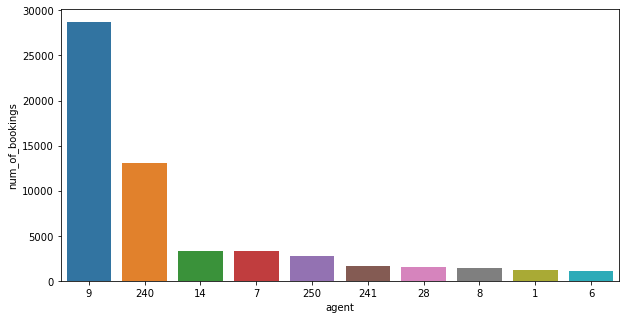

In [87]:
d1 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

Agent no. 9 has made most no. of bookings.

Q2) Which room type is in most demand and which room type generates highest adr?

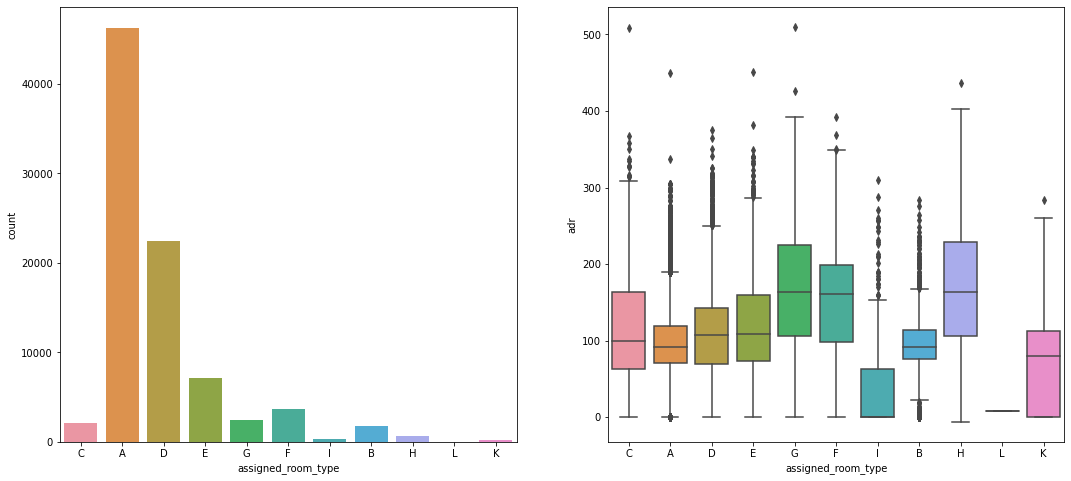

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

Q3) Which meal type is most preffered meal of customers?

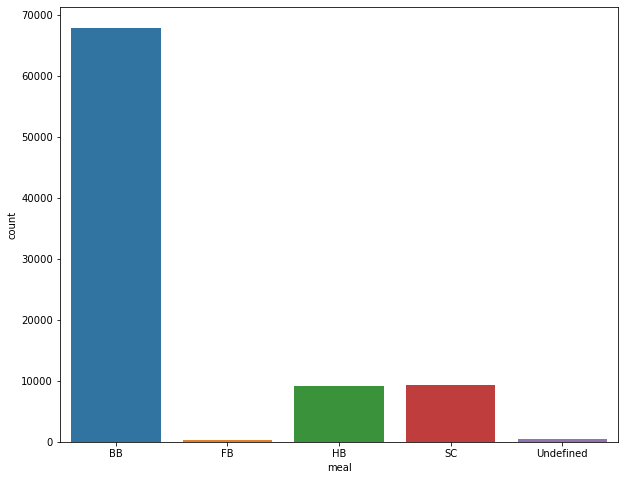

In [89]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df1['meal'])
plt.show()

Most preferred meal type is BB (Bed and breakfast).

# Hotel wise analysis

Q1) What is percentage of bookings in each hotel?

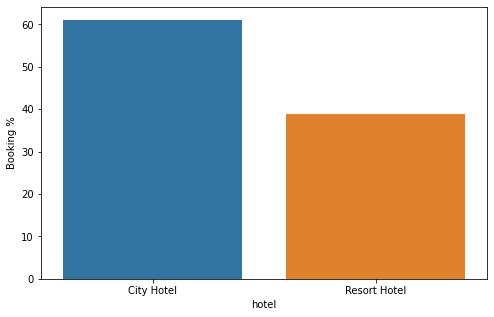

In [90]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2) which hotel seems to make more revenue?

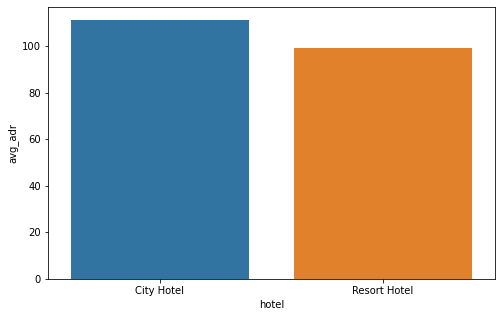

In [91]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

Q3) Which hotel has higher lead time?

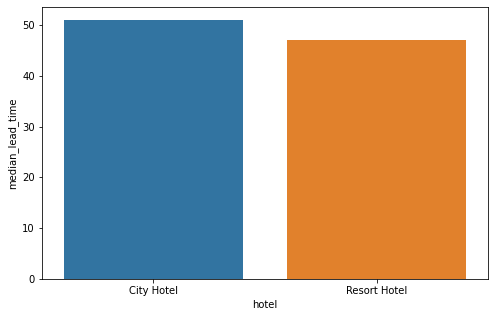

In [93]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

Q4) What is preferred stay length in each hotel?

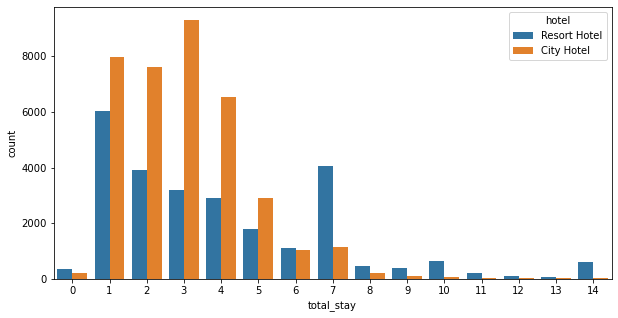

In [94]:
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

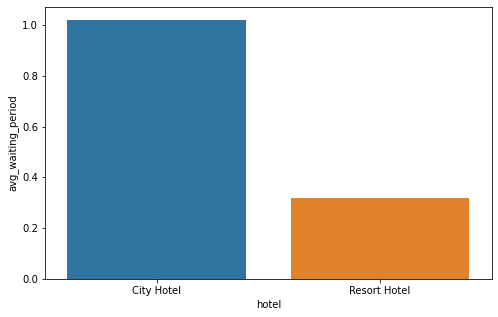

In [95]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

Q6) Which hotel has higher bookings cancellation rate.

In [96]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


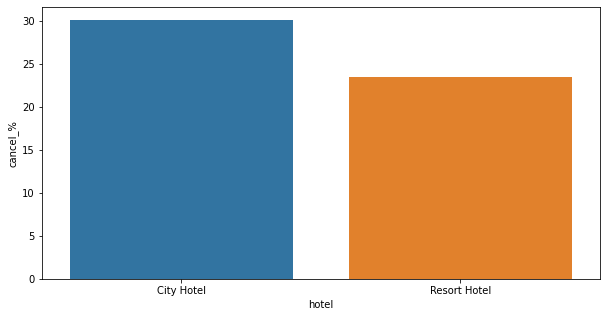

In [97]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

Q7) Which hotel has high chance that its customer will return for another stay?

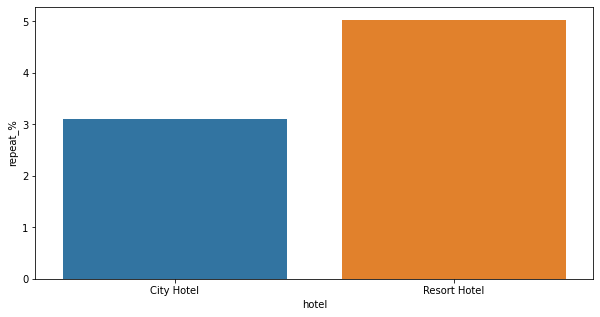

In [98]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

# Distribution Channel wise Analysis

Q1) Which is the most common channel for booking hotels?

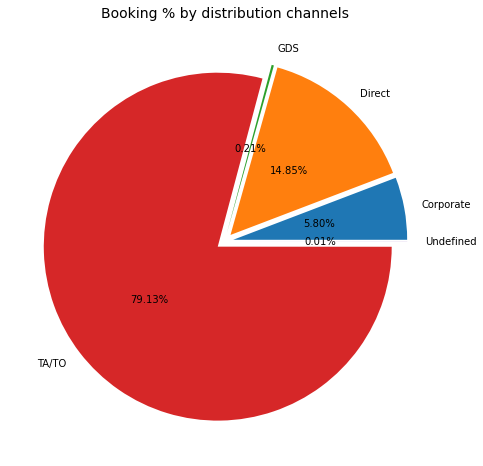

In [99]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Q2) Which channel is mostly used for early booking of hotels?

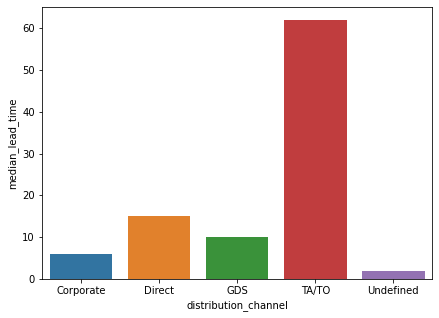

In [100]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

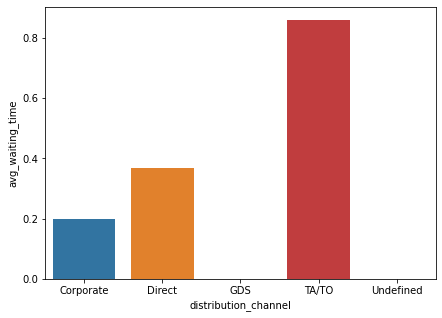

In [101]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel brings better revenue generating deals for hotels?

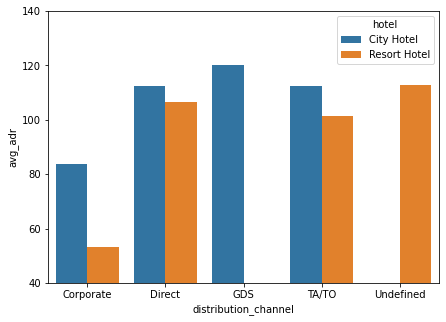

In [104]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

# Booking cancellation Analysis

Let us try to understand what causes the people to cancel the booking.

Q1) Which significant distribution channel has highest cancellation percentage?

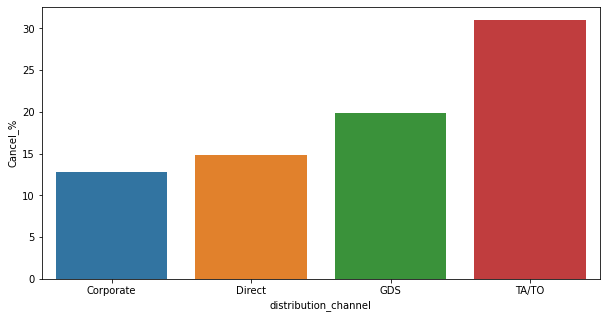

In [105]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.